## Importación de las bibliotecas que vamos a usar

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import chart_studio
import chart_studio.plotly as py

# Información de los atributos:

## Información del cliente:
1. **age:** Edad (numeric)
2. **job:**  Tipo de trabajo (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') -->
3. **marital:**  Estado civil (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. **education:** Nivel educativo (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. **default:** Posee crédito en default? (categorical: 'no','yes','unknown')
6. **housing:** Posee un crédito hipotecario? (categorical: 'no','yes','unknown')
7. **loan:** Posee un crédito personal? (categorical: 'no','yes','unknown')
## Relacionado con el último contacto en la campaña actual:
8. **contact:** Forma de contacto (categorical: 'cellular','telephone')
9. **month:** Mes del último contacto dentro del año (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. **day_of_week:** Día del ultimo contacto dentro de la semana (categorical: 'mon','tue','wed','thu','fri')
11. **duration:** Duración del ultimo contacto, en segundos (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## Otros atributos:
12. **campaign:** Número de contactos realizados durante esta campaña para este cliente. (numeric, incluye ultimo contacto)
13. **pdays:** Número de días que pasaron después del último contacto con el cliente de una campaña previa. (numeric; 999 means client was not previously contacted)
14. **previous:** Número de contactos realizados antes de esta campaña para este cliente. (numeric)
15. **poutcome:** Resultado de la campaña de marketing previa.(categorical: 'failure','nonexistent','success')
## Atributos del contexto socioeconómico
16. **emp.var.rate:** employment variation rate - quarterly indicator (numeric)
17. **cons.price.idx:** consumer price index - monthly indicator (numeric)
18. **cons.conf.idx:** consumer confidence index - monthly indicator (numeric)
19. **euribor3m:** euribor 3 month rate - daily indicator (numeric)
20. **nr.employed:** number of employees - quarterly indicator (numeric)

## Realizó depósito a largo plazo (variable target):
21. **y:**  El cliente realizó un depósito a largo plazo? (binary: 'yes','no')

#### Dataset obtenido de  **http://archive.ics.uci.edu/ml/datasets/Bank+Marketing**

## Carga del dataset de Bank Marketing Campaign

In [2]:
path = "../Data/"
key = "bank-additional-full.csv"

data = pd.read_csv(path + key, sep= ";")

display(data.head(3))
print('El dataframe cuenta con {} instancias con {} features'.format(data.shape[0], data.shape[1]))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


El dataframe cuenta con 41188 instancias con 21 features


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## EDA

In [7]:
def plot_bar(column):
    #Dataframe temporal 
    temp_1 = pd.DataFrame()
 
    temp_1['No_deposit'] = data[data['y'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = data[data['y'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Número de clientes')
    plt.title('Distribución por {} and deposit'.format(column))
    plt.show();

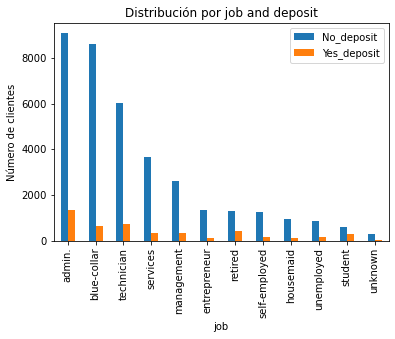

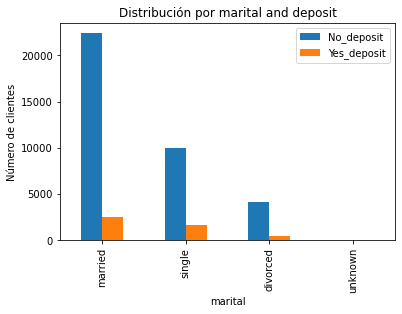

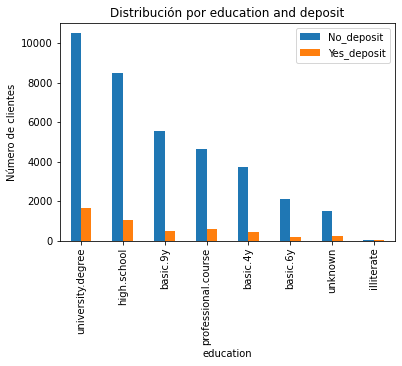

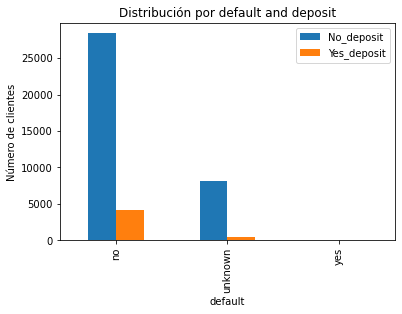

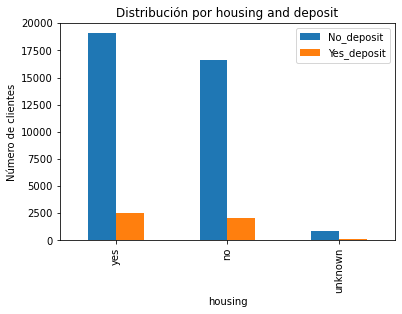

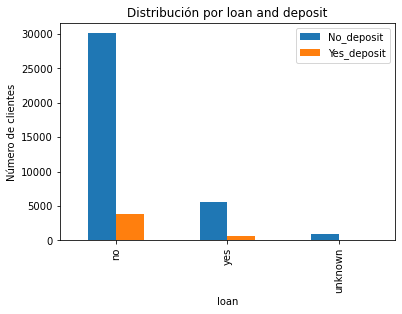

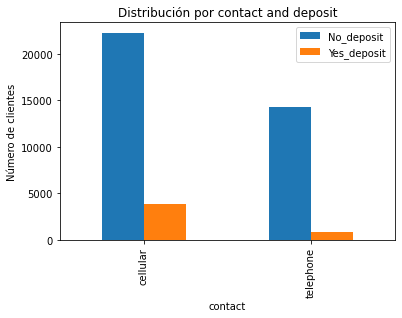

(None, None, None)

In [11]:
plot_bar("job"), plot_bar("marital"), plot_bar("education"), plot_bar("default"), 
plot_bar("housing"), plot_bar("loan"), plot_bar("contact")

**Análisis primario de variables categóricas:**
1. Personal administrativo realiza la mayor cantidad de depósitos a largo plazo. Vale destacar a los estudiantes con una relación entre los que realizaron depósitos y los que no relativamente buena.
2. En términos relativos, los clientes solteros tienen mejor respuesta.
3. No se ve una marcada diferencia entre clientes que tienen crédito hipotecario y los que no.
4. El contacto mediante celular tiene mejores resultados que por teléfono

## Análisis variable age

**Ver de hacerlo en bines**

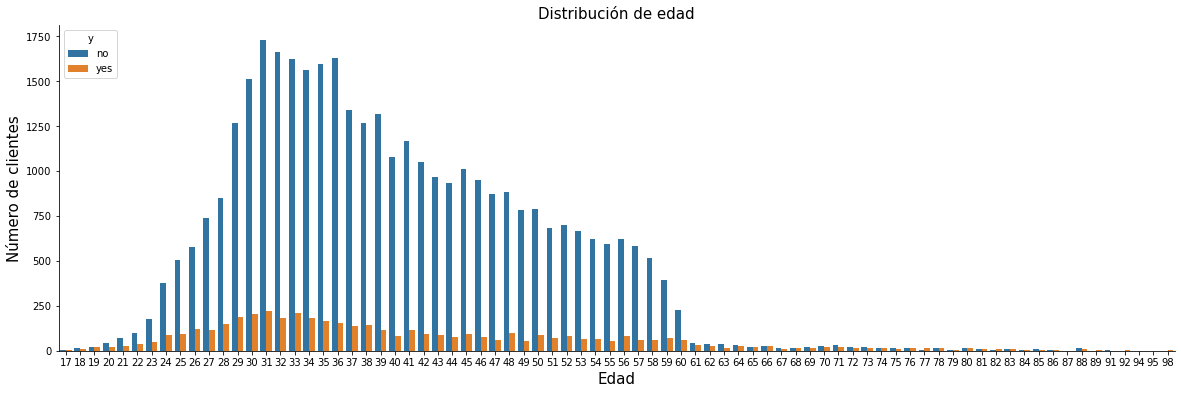

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 6)
sns.countplot(x = "age",hue = "y", data = data)
ax.set_xlabel("Edad", fontsize=15)
ax.set_ylabel('Número de clientes', fontsize=15)
ax.set_title('Distribución de edad', fontsize=15)
sns.despine()

In [13]:
# Quartiles
print('1º Quartile: ', data['age'].quantile(q = 0.25))
print('2º Quartile: ', data['age'].quantile(q = 0.50))
print('3º Quartile: ', data['age'].quantile(q = 0.75))
print('4º Quartile: ', data['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', data['age'].quantile(q = 0.75) + 
                      1.5*(data['age'].quantile(q = 0.75) - data['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers


## **Duration vs campaign**

**Ver de hacerlo como histograma**

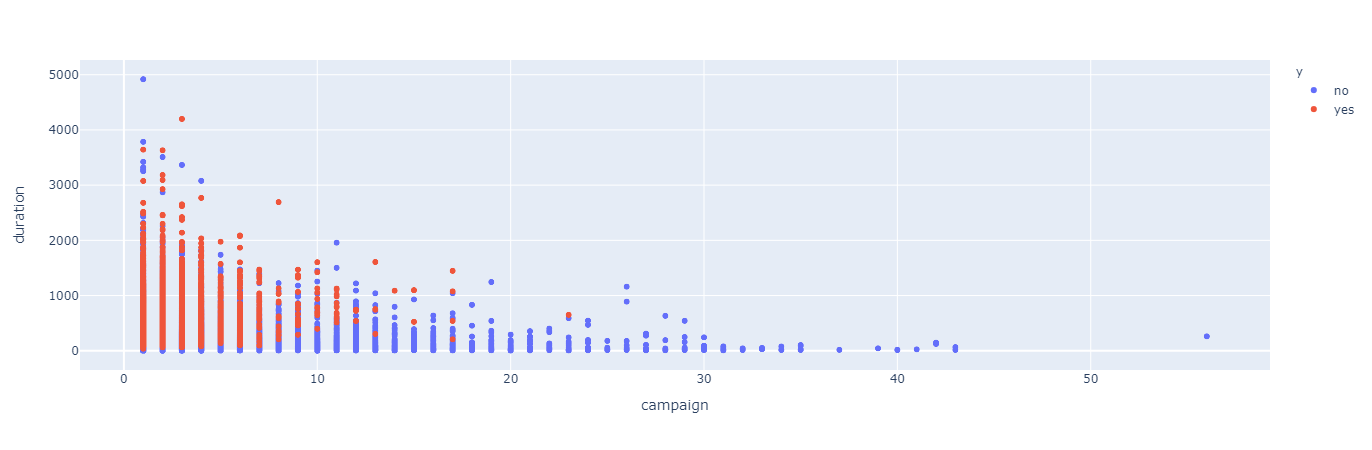

In [20]:
fig = px.scatter(data, x="campaign", y="duration", color="y")
fig.show()

## **Análisis mes del último contacto** ##

**Ver de que lo ordene por meses y no por cantidad**

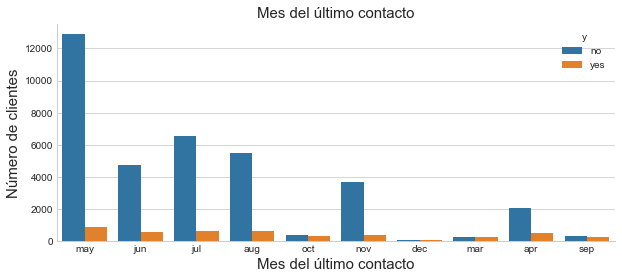

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.countplot(x = "month",hue = "y", data = data)
ax.set_xlabel("Mes del último contacto", fontsize=15)
ax.set_ylabel('Número de clientes', fontsize=15)
ax.set_title('Mes del último contacto', fontsize=15)
sns.despine()

## **Día del ultimo contacto dentro de la semana**

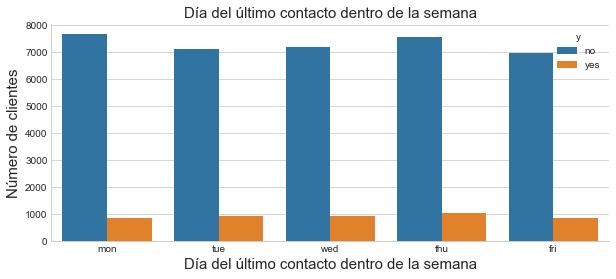

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.countplot(x = "day_of_week",hue = "y", data = data)
ax.set_xlabel("Día del último contacto dentro de la semana", fontsize=15)
ax.set_ylabel('Número de clientes', fontsize=15)
ax.set_title("Día del último contacto dentro de la semana", fontsize=15)
sns.despine()

## **Resultado de campaña anterior**

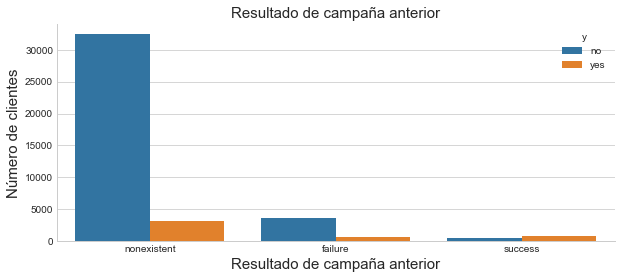

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.countplot(x = "poutcome",hue = "y", data = data)
ax.set_xlabel("Resultado de campaña anterior", fontsize=15)
ax.set_ylabel('Número de clientes', fontsize=15)
ax.set_title("Resultado de campaña anterior", fontsize=15)
sns.despine()

## **Analisis variable euribor3m**

C:\Users\gtoso\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\gtoso\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\gtoso\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functio

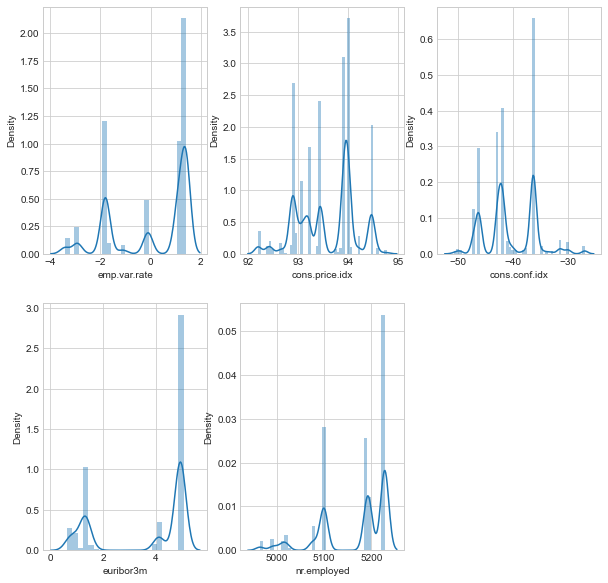

In [36]:
plt.subplot(231)
sns.distplot(data['emp.var.rate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data['cons.price.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data['cons.conf.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data['euribor3m'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data['nr.employed'])
fig = plt.gcf()
fig.set_size_inches(10,10)

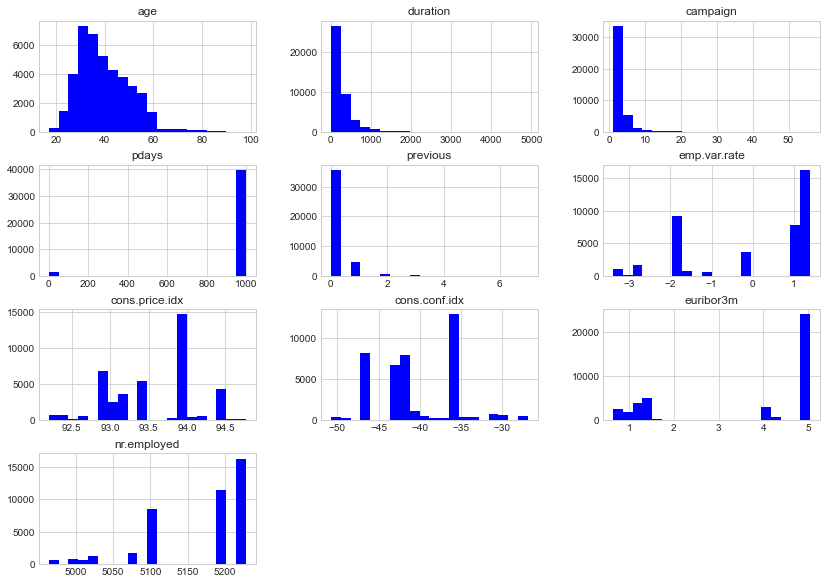

In [14]:
#Distribucion de los datos
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10), color='blue')
plt.show()

[Text(0.5, 1.0, 'Correlation Matrix')]

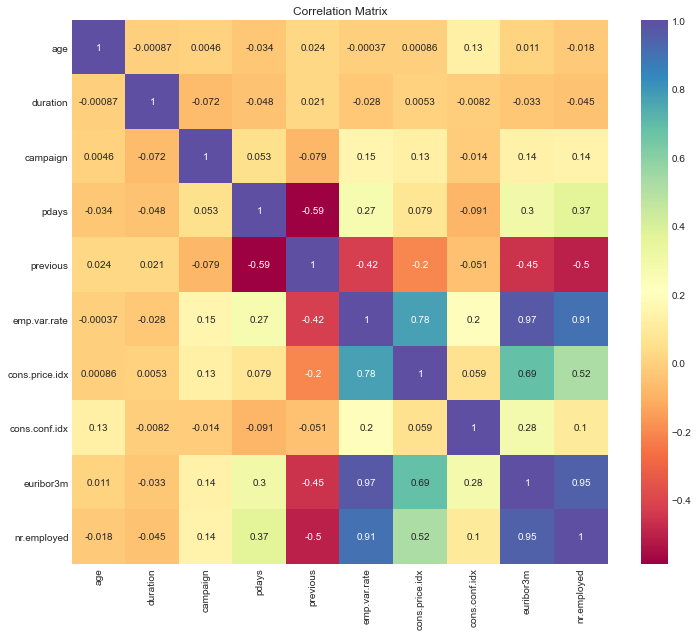

In [15]:
#Correlacion de los datos
corr = data.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,